In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import random

In [2]:
np.random.seed(52)

In [3]:
df = pd.read_csv('digit_data.csv')

In [4]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = np.array(df)
m, n = data.shape
print(m,n)


42000 785


In [7]:
np.random.shuffle(data) # shuffle before splitting into dev and training sets

In [8]:
#Creating Test Set
data_abc = data[0:1000].T
Y_abc = data_abc[0]
X_abc = data_abc[1:n]
X_abc = X_abc / 255.


In [9]:
#Creating Train Set
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [10]:
m_train

41000

In [11]:
X_train.shape

(784, 41000)

In [12]:
random_index = np.random.randint(0, 41000)
random_index

8597

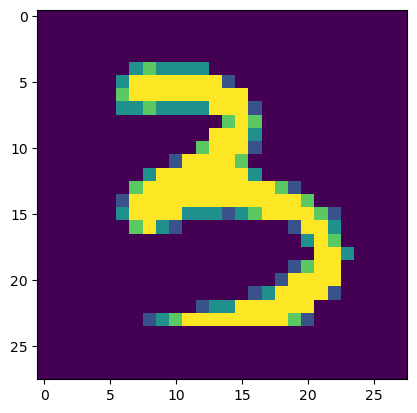

In [13]:
img = X_train.T[random_index]
img = np.reshape(img, (28,28))
plt.imshow(img)

In [14]:
Y_train[random_index]

3

**FUNTIONS**

1. Initialize parameters

In [15]:
def init_params():
#     # Number of nodes in the input layer
#     n_input = 784

#     # Number of nodes in the hidden layer
#     n_hidden = 10

#     # Number of nodes in the output layer
#     n_output = 10
    #Initialize weights and biases for the hidden layer
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    
    # Initialize weights and biases for the output layer
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

2. RELU

In [16]:
def ReLU(Z):
    return np.maximum(Z, 0)

3. SOFTMAX

In [17]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

4. RELU DERIVATIVE

In [18]:
def ReLU_deriv(Z):
    return Z > 0

5. Forward Propagation

In [19]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

6. One Hot

In [20]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

7. Backward Propagation

In [21]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

8.Update Parameters

In [22]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

9.Get predictions

In [23]:
def get_predictions(A2):
    return np.argmax(A2, 0)

10. Accuracy

In [24]:
def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

11. Gradient Descent

In [25]:
# accuracy_scores = []  # To store accuracy scores at different iterations
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    accuracy_scores = []  # To store accuracy scores at different iterations

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 5 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(accuracy)
            accuracy_scores.append((i, accuracy))
     # Convert accuracy_scores to separate lists for plotting
    iterations, accuracies = zip(*accuracy_scores)
   
    # Plotting accuracy vs iterations
    plt.plot(iterations, accuracies)
    plt.grid()
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Iterations')
    
    # Create a legend with custom labels and place it at the top of the plot
    legend_handles = [
        plt.Line2D([], [], marker='o', color='w', label='THA076BEI009\nTHA076BEI036', markersize=10, markerfacecolor='black', alpha=0)
    ]
    plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.84, 1.12))  # Adjust the bbox_to_anchor values

    plt.show()
    return W1, b1, W2, b2


Iteration:  0
0.10353658536585365
Iteration:  5
0.11421951219512196
Iteration:  10
0.1505609756097561
Iteration:  15
0.18865853658536585
Iteration:  20
0.25670731707317074
Iteration:  25
0.31114634146341463
Iteration:  30
0.3479024390243902
Iteration:  35
0.37626829268292683
Iteration:  40
0.40102439024390246
Iteration:  45
0.4222682926829268
Iteration:  50
0.4460487804878049
Iteration:  55
0.468780487804878
Iteration:  60
0.4906829268292683
Iteration:  65
0.513219512195122
Iteration:  70
0.532390243902439
Iteration:  75
0.5511951219512196
Iteration:  80
0.568170731707317
Iteration:  85
0.5842439024390244
Iteration:  90
0.5990487804878049
Iteration:  95
0.6130487804878049
Iteration:  100
0.6252926829268293
Iteration:  105
0.6374634146341464
Iteration:  110
0.6482439024390244
Iteration:  115
0.6577073170731708
Iteration:  120
0.6669024390243903
Iteration:  125
0.6759756097560976
Iteration:  130
0.6835121951219513
Iteration:  135
0.691390243902439
Iteration:  140
0.6989268292682926
Itera

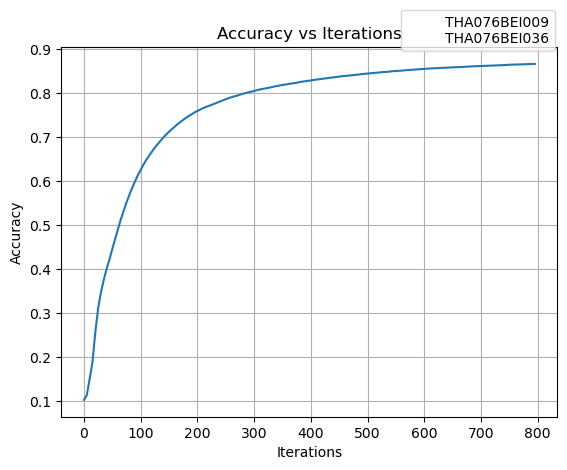

In [26]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 800)

12. Make predictions

In [27]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

13. Test Predictions

In [28]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    legend_handles = [
        plt.Line2D([], [], marker='o', color='w', label='THA076BEI009\nTHA076BEI036', markersize=10, markerfacecolor='black', alpha=0)
    ]
    plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.84, 1.12))  # Adjust the bbox_to_anchor values

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')

    plt.show()

Prediction:  [3]
Label:  3


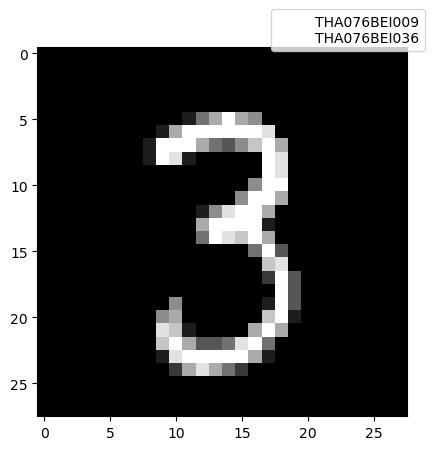

In [29]:
test_prediction(0, W1, b1, W2, b2)


Prediction:  [2]
Label:  4


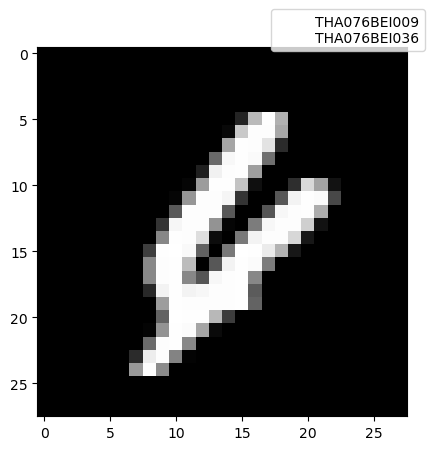

In [30]:
test_prediction(1, W1, b1, W2, b2)

Prediction:  [9]
Label:  4


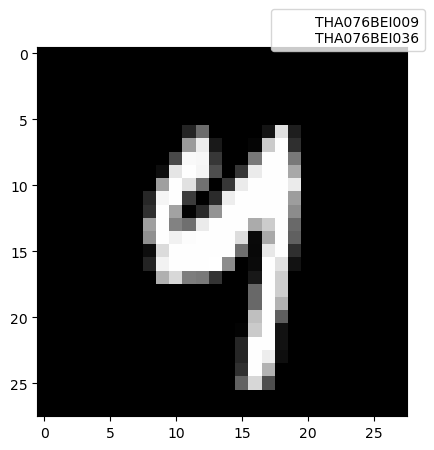

In [31]:
test_prediction(2, W1, b1, W2, b2)

Prediction:  [2]
Label:  2


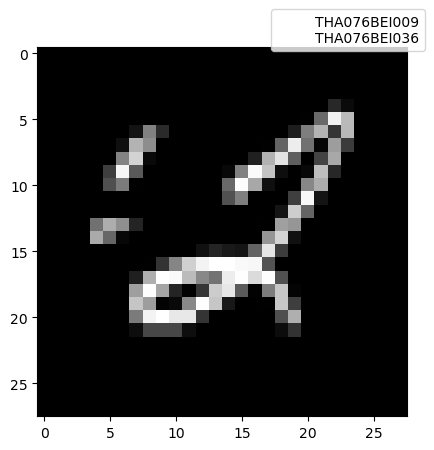

In [32]:


test_prediction(3, W1, b1, W2, b2)

In [33]:
abc_predictions = make_predictions(X_abc, W1, b1, W2, b2)
get_accuracy(abc_predictions, Y_abc)

0.867

In [34]:
from sklearn.metrics import classification_report

abc_predictions = make_predictions(X_abc, W1, b1, W2, b2)
report = classification_report(abc_predictions,Y_abc, digits=4)

print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0     0.9355    0.9457    0.9405        92
           1     0.9737    0.9098    0.9407       122
           2     0.8972    0.8727    0.8848       110
           3     0.8667    0.8835    0.8750       103
           4     0.9032    0.8571    0.8796        98
           5     0.7582    0.8118    0.7841        85
           6     0.9140    0.8673    0.8901        98
           7     0.8600    0.8515    0.8557       101
           8     0.7800    0.8667    0.8211        90
           9     0.7692    0.7921    0.7805       101

    accuracy                         0.8670      1000
   macro avg     0.8658    0.8658    0.8652      1000
weighted avg     0.8701    0.8670    0.8680      1000

